<a href="https://colab.research.google.com/github/KEHSANN/hosh_masnoi/blob/main/PROJECT2/P2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 19.9MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [2]:

from PIL import Image, ImageDraw
import matplotlib.image as img
import random
from imageio import imread

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation


In [3]:

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 5000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


Hamming

noisy3.jpg


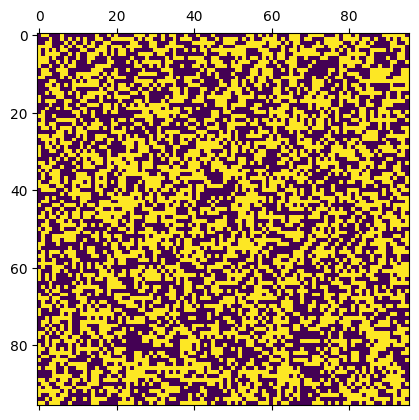

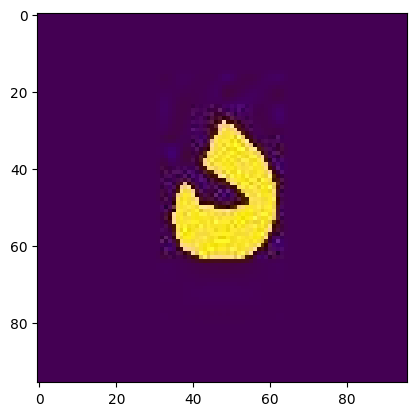

In [4]:

import os
from math import sqrt

def change(vector, a, b):
  vector = np.array(vector)
  matrix = vector.reshape((a, b))
  return matrix

def product(matrix, vector, T):
  result_vector = []
  for i in range(len(matrix)):
    sum = 0
    for j in range(len(vector)):
      sum = sum + matrix[i][j] * vector[j]
    result_vector.append((sum + T))
  return result_vector

def action(vector, T, Emax):
  result_vector = []
  for value in vector:
    if value <= 0:
      result_vector.append(0)
    elif 0 < value <= T:
      result_vector.append(Emax*value)
    elif value > T:
      result_vector.append(T)
  return result_vector

def sum(vector, j):
  total_sum = 0
  for i in range(0, len(vector)):
    if i != j:
      total_sum = total_sum + vector[i]
  return total_sum

def norm(vector, p):
  difference = []
  for i in range(len(vector)):
    difference.append(vector[i] - p[i])
  sum = 0
  for element in difference:
    sum += element * element
  return sqrt(sum)

path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []
for i in path:
  x.append(convertImageToBinary(i))

image_path = "/content/noisy3.jpg"
y = convertImageToBinary(image_path)

print(os.path.basename(image_path))

k = len(x)
a = 96
b = 96
q = change(y, a, b)
plt.matshow(q)
m = len(x[0])
T = m / 2
Emax = 0.000001
U = 1 / Emax

w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]


for i in range(k):
  for j in range(k):
    if j == i:
      E[i][j] = 1.0
    else:
      E[i][j] = -e

s = [product(w, y, T)]
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

while norm(y[i], p) >= Emax:
  s.append([0 for j in range(len(s[0]))])
  for j in range(len(s[0])):
    s[i + 1][j] = y[i][j] - e*sum(y[i], j)
  y.append((action(s[i + 1], U, Emax)))
  i += 1
  p = y[i - 1]

result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1
q = change(x[result_index - 1], a, b)

from matplotlib import pyplot as plt
from matplotlib import image as img

img.imsave('output.jpg', q)
output_img = Image.open('output.jpg')
output_img = output_img.transpose(Image.FLIP_TOP_BOTTOM)
output_img = output_img.transpose(Image.ROTATE_270)
output_img.save('output.jpg')

plt.show()
image = img.imread('output.jpg')
print('\n' + '\n')
plt.imshow(image)
plt.show()





MissedPoint

In [5]:
from PIL import Image, ImageDraw
import random

def generateMissedPointImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        missedpoint_image_path = f"/content/missedpoint{i}.jpg"
        getMissedPointBinaryImage(image_path, missedpoint_image_path)
        print(f"MissedPoint image for {image_path} generated and saved as {missedpoint_image_path}")

def getMissedPointBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the missedpoint image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing missedpoint.
    missedpoint_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):

            # Generate a random missedpoint value within the specified factor.
            rand = random.randint(-missedpoint_factor, missedpoint_factor)

            # Add the missedpoint to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]
            if red == 0 & green == 0 & blue == 0:
              red = red + rand
              green = green + rand
              blue = blue + rand

            # Ensure that RGB values stay within the valid range (0-255).
              if red < 0:
                  red = 0
              if green < 0:
                  green = 0
              if blue < 0:
                  blue = 0
              if red > 255:
                  red = 255
              if green > 255:
                  green = 255
              if blue > 255:
                  blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate missedpoint images and save them
generateMissedPointImages()


MissedPoint image for /content/1.jpg generated and saved as /content/missedpoint1.jpg
MissedPoint image for /content/2.jpg generated and saved as /content/missedpoint2.jpg
MissedPoint image for /content/3.jpg generated and saved as /content/missedpoint3.jpg
MissedPoint image for /content/4.jpg generated and saved as /content/missedpoint4.jpg
MissedPoint image for /content/5.jpg generated and saved as /content/missedpoint5.jpg
